In [19]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')
#this was my attempt at accessing the data on my GDrive. The alternative link provided in the notes solved it instead.
# What was this mount/unmount code supposed to do?

Mounted at /content/drive


In [52]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1IkOEiA4flFPww4tbGGQzp3Nx-QQKm092&export=download", "TranspoData.csv")

('TranspoData.csv', <http.client.HTTPMessage at 0x79df2868d410>)

In [26]:
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np
from statistics import *
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

In [27]:
import urllib

from google.colab import files
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [53]:
dat=pd.read_csv('TranspoData.csv')

In [54]:
dat.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage',
       ...
       'ferrytop_8', 'ferrytop_9', 'ferrytop_10', 'ferrytop_10_TEXT',
       'ferryrec', 'ridepay', 'rideexp', 'ridepunct', 'raffle', 'Q92'],
      dtype='object', length=257)

In [57]:
dat.columns[12:15] #dataset has over 200 variables, just wanted to check the names of these ones.

Index(['zip', 'town', 'vehnum'], dtype='object')

In [60]:
dat_short=dat.sample(frac=0.25, replace=False, random_state=4) (approximately n=50)

In [63]:
dat_short.tail(2)

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,ferrytop_8,ferrytop_9,ferrytop_10,ferrytop_10_TEXT,ferryrec,ridepay,rideexp,ridepunct,raffle,Q92
124,7/3/2024 11:55,7/3/2024 12:11,IP Address,100,940,True,7/3/2024 12:11,R_3GPtY91URsAzWIp,qr,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
163,4/21/2024 5:04,4/21/2024 5:31,IP Address,100,1646,True,4/21/2024 5:31,R_733UmCIM8kxMtqW,qr,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN


In [67]:
dat_short['zip'].mode()

,zip
0,8108


In [64]:
dat_short['town'].mode()

,town
0,Camden City


In [65]:
dat_short['vehnum'].mode()

,vehnum
0,One
1,Two


In [69]:
dat_short['zip'].value_counts(dropna=False)

,count
zip,
8108,6
8107,5
8043,4
8109,3
8033,3
8021,3
8084,2
0,2
8003,2


In [72]:
dat_short['town'].value_counts(dropna=False)

,count
town,
Camden City,19
Collingswood,5
"I don't live in or commute to Camden County, I'm just visiting",3
Voorhees Township,3
Haddonfield,3
Winslow Township,3
Clementon,2
Haddon Township,2
Chesilhurst,2


<Axes: >

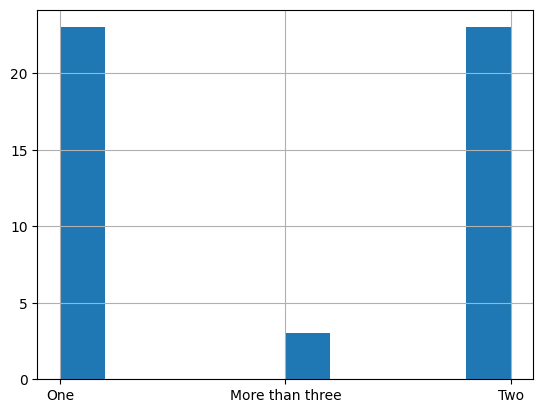

In [74]:
dat_short['vehnum'].hist()

In [75]:
pd.crosstab(dat_short["zip"], dat["town"]) #need to merge categories

town,Berlin,Camden City,Cherry Hill,Chesilhurst,Clementon,Collingswood,Gloucester Township,Haddon Heights,Haddon Township,Haddonfield,"I don't live in or commute to Camden County, I'm just visiting",Merchantville,Oaklyn,Pennsauken Township,Stratford,Voorhees Township,Winslow Township
zip,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8003,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8021,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
8026,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8033,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
8035,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [91]:
import csv
with open('TranspoData.csv', 'w', newline='') as csvfile:
    area = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    with open('TranspoData.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if 'town' in row and 'Camden City' in row:
                area.writerow(['1'])
            else:
                area.writerow(['2'])
#trying to merge categories by labeling Camden city cases as area 1 and combining all non-Camden-city towns as area 2

In [93]:
dat_area=dat.sample(frac=0.25, replace=False, random_state=4) #rerunning sample split

In [95]:
pd.crosstab(dat_area["vehnum"], dat_area["area"]) #according to the AI, the new "area" variable is not present in the sample

KeyError: 'area'

In [94]:
dat['area'] = dat['town'].apply(lambda x: '1' if 'Camden City' in x else '2') #AI suggested this but it didn't work

TypeError: argument of type 'float' is not iterable

How to manipulate/clean data from python? I know how to it on spss but not sure how to do it here.